# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#resources">Resources</a></li>    
</ul>

<a id='intro'></a>
## Introduction

In this project we'll be analyzing data associated with movies released between 1960-2015. In particular we'll be interested in finding trends among several variables, by answering the following questions: 

    1.	Which genres receive the highest ratings?
    2.	Do movies with a longer runtime receive worse ratings than movies with a shorter runtime?
    3.	Do movies with higher budgets generally get better ratings than those with lower budgets?
    4.	What months do movies have the highest revenue?


The dataset and documentation  can be found here: 

[Movie Data](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv) 

[Documentation](https://www.kaggle.com/tmdb/tmdb-movie-metadata/kernels)

### 1. Importing the required libraries for data analysis.

Below are the libraries we need for exploratory data analysis in this project

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling - gather, assess, and clean the data in preparation for data exploration

## Gather & Assess:

### 2.  Load the dataset and print a few rows to get an idea of the data in it.

In [114]:
#load dataset
df_movies = pd.read_csv('tmdb_movies.csv')
#review the first 3 rows to see columns and data format
df_movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.50,2015,137999939.30,1392445893.00
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.10,2015,137999939.30,348161292.50
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.30,2015,101199955.50,271619025.40


The numerical data will be discussed in the cells that follow, but most of the text columns will later be deleted, because they don't help us answer the questions we posed at the beginning. The exception is the genres column. As we can see by looking at the column data, movies are associated with multiple genres and separated by a | symbol. Because there can be many different combinations of genres, using the data as it's currently provided won't work for our analysis. Instead, we'll assume the first genre listed is the primary genre for each movie, and during the data cleaning process we'll separate the first genre listed in each row into a new column to use for aswering our question that uses this data. This will reduce the genres to a smaller set of specific genres for us to work with.


### 3: Here is a description of the 21 columns to make it clear what each one represents:

| Column               | Description                                                                                                                                                                         |
|----------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                   | unique identifier in tmdb for each movie                                                                                                                                                    |
| imdb_id              | unique identifier in imdb for each movie                                                                                                                                            |
| popularity           | [popularity of movie on the tmdb website](https://developers.themoviedb.org/3/getting-started/popularity) |
| budget               | movie budget when it was released                                                                                                                                                   |
| revenue              | movie revenue                                                                                                                                                                       |
| original_title       | movie title                                                                                                                                                                         |
| cast                 | movie cast                                                                                                                                                                          |
| homepage             | movie website                                                                                                                                                                       |
| director             | movie director                                                                                                                                                                      |
| tagline              | movie catchphrase                                                                                                                                                                   |
| overview             | overview of movie plot                                                                                                                                                              |
| runtime              | movie length in minutes                                                                                                                                                             |
| genres               | list of genres the movie is included in                                                                                                                                             |
| production_companies | production companies for the movie                                                                                                                                                  |
| release_date         | date the movie was released                                                                                                                                                         |
| vote_count           | number of votes for the movie on tmdb                                                                                                                                               |
| vote_average         | average movie rating between 1-10                                                                                                                                                   |
| release_year         | year movie was released                                                                                                                                                             |
| budget_adj           | adjusted budget in terms of 2010 dollars, accounting for inflation over time                                                                                                        |
| revenue_adj          | adjusted revenue in terms of 2010 dollars, accounting for inflation over time                                                                                                       |

### 4. The shape function shows how many rows and columns we're working with.

In [115]:
df_movies.shape

(10866, 21)

We're starting with 10,866 rows and 21 columns. 

### 5. Determine if there are duplicate rows and remove them so no movie data is used more than once for analysis. 

First we find out how many duplicated rows we have by using the duplicated and sum functions. During the cleaning process the row(s) will be deleted.

In [116]:
duplicate_rows = df_movies.duplicated().sum().astype(str)
print('The total number of duplicate rows to be deleted later: ' + duplicate_rows)

The total number of duplicate rows to be deleted later: 1


Just one row will be deleted later

### 6. Use the info() function to determine which columns are missing data, and whether column data types make sense. 

In [117]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

To determine where we're missing data we look for any columns that don't have 10,866 rows. Below we can see that we're missing data in the columns: imdb_id, cast, homepage, director, taglne, keywords, overview, genres, production_companies. We won't need all of the columns to answer our questions, so some columns with missing data will be removed from our dataset. For the columns that remain, the rows with missing data will be deleted before answering our questions. 

The release_date column is currently a string (shown as object below). Later we'll change the column to the datetime data type, which we'll use to help answer one of our questions posed at the beginning.

### 7. The describe function gives us more insight, via descriptive statistics, about the numerical data in our dataset. 

In [118]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.00


Looking at this data, there are some issues we'll want to clean up either during the data cleaning process or while we're working to answer our questions later in the process. 

The data we'll take action on later includes: 
- budget and revenue data isn't in a format that makes it easy to see the actual dollar figures
- budget and/or revenue data is zero for some of the data
- runtime is zero for some of the data

## Data Cleaning - For the data cleaning process, some of the issues identified during the above analysis will be resolved. 
- delete duplicate row
- delete columns we don't need
- format numerical columns
- delete rows with missing data
- change release_year format to datetime and extract the month to a new column
- extract the first genre from the genres column for each row into a new column

Other issues we identified will be handled during data exploration phase, such as rows where budgets and revenues are zero. The rows won't be deleted during the cleaning phase, because it would reduce the dataset by more than half, which would also remove other valueable data from other columns in the same rows. Instead, these rows will be excluded when answering questions that requre data from the budget and revenue columns.  

### 8. Delete the duplicate row with the drop_duplicates() function, and confirm no duplicates remain.

In [119]:
#drop the duplicate row
df_movies.drop_duplicates(inplace=True)

In [120]:
#confirm no duplicates remain
print('The total number of duplicate rows that remain are: ' + df_movies.duplicated().sum().astype(str))

The total number of duplicate rows that remain are: 0


### 9. Drop the columns not needed for analysis usin the drop() function.

Based on the questions we'll be answering, we can drop certain columns from our dataset:
- id
- imdb_id
- popularity
- cast
- homepage
- tagline
- keywords
- overview

In [121]:
df_movies.drop(['id', 'imdb_id', 'popularity', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'director', 'production_companies'], axis=1, inplace=True)

In [122]:
#confirm columns were dropped
df_movies.head(1)

,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.50,2015,137999939.30,1392445893.00


### 10. Format numerical data using the options and display attributes to show actual value with two digits after the decimal.

In [123]:
pd.options.display.float_format = "{:.2f}".format

In [124]:
#confirm formatting is now as expected
df_movies.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00
mean,14624286.06,39826896.08,102.07,217.40,5.98,2001.32,17549894.04,51369001.76
std,30914284.61,117008277.46,31.38,575.64,0.94,12.81,34307526.66,144638333.13
min,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,15000000.00,24000000.00,111.00,146.00,6.60,2011.00,20853251.08,33701729.01
max,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.00


In [125]:
#confirm the columns have been dropped
df_movies.head(1)

,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.50,2015,137999939.30,1392445893.00


### 11. Delete rows with missing data using the dropna() function.

Now that we've deleted some columns, we'll re-run the info() function to see if we still have columns with missing data.

In [126]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1018.6+ KB


The genres column is the only column remaining that has missing rows (23 of them). Let's look at these rows with null values, to confirm it is fine to drop them.

In [127]:
df_movies[df_movies['genres'].isnull()]

,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0,0,Belli di papÃ,100,NaN,10/29/2015,21,6.10,2015,0.00,0.00
620,0,0,All Hallows' Eve 2,90,NaN,10/6/2015,13,5.00,2015,0.00,0.00
997,0,0,Star Wars Rebels: Spark of Rebellion,44,NaN,10/3/2014,13,6.80,2014,0.00,0.00
1712,0,0,Prayers for Bobby,88,NaN,2/27/2009,57,7.40,2009,0.00,0.00
1897,0,0,Jonas Brothers: The Concert Experience,76,NaN,2/27/2009,11,7.00,2009,0.00,0.00
2370,0,0,Freshman Father,0,NaN,6/5/2010,12,5.80,2010,0.00,0.00
2376,0,0,Doctor Who: A Christmas Carol,62,NaN,12/25/2010,11,7.70,2010,0.00,0.00
2853,0,0,Vizontele,110,NaN,2/2/2001,12,7.20,2001,0.00,0.00
3279,0,0,ì•„ê¸°ì™€ ë‚˜,96,NaN,8/13/2008,11,6.10,2008,0.00,0.00
4547,0,0,London 2012 Olympic Opening Ceremony: Isles of...,220,NaN,7/27/2012,12,8.30,2012,0.00,0.00


These rows have low vote counts, and no revenue or budget information, so they can be removed without having much affect on our analysis. 

In [128]:
#drop rows with missing values
df_movies.dropna(inplace=True)

In [129]:
#confirm missing values dropped
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 11 columns):
budget            10842 non-null int64
revenue           10842 non-null int64
original_title    10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
release_date      10842 non-null object
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1016.4+ KB


Now all columns have 10,842 rows.

### 12. Change the data type of the release_date column to a timestamp using the to_datetime() function and create a new column with only the month.

To answer one of our questions, we need the release_month of each movie. While we could keep the date as a string and extract the value we need, I want to show how this can be done with the datetime functionality.

In [130]:
#convert release_date column to Timestamp
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

In [131]:
#confirm change to timestamp
type(df_movies['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [132]:
#create release_month column and assign months to it
df_movies['release_month'] =  df_movies['release_date'].dt.month

In [133]:
#confirm month column created and data looks good
df_movies.head(5)

,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.50,2015,137999939.30,1392445893.00,6
1,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.10,2015,137999939.30,348161292.50,5
2,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.30,2015,101199955.50,271619025.40,3
3,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.50,2015,183999919.00,1902723130.00,12
4,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.30,2015,174799923.10,1385748801.00,4


If we scroll to the far right of the data output, we can see that a new column release_month has been created and contains the month of every release date.

### 13. Remove the first genre from the genres column for every row using the apply() function and create a new column with that genre.

To answer one of our questions, we need the primary genre for every movie

In [134]:
#split the genres in each row on every | symbol, extract the first genre, & save values to a new column called primary_genre
df_movies['primary_genre'] = df_movies['genres'].apply(lambda x: x.split("|")[0])

In [135]:
#confirm the new column was created and contains the first genre value from each row in the genres column
df_movies.head(5)

,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,primary_genre
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.50,2015,137999939.30,1392445893.00,6,Action
1,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.10,2015,137999939.30,348161292.50,5,Action
2,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.30,2015,101199955.50,271619025.40,3,Adventure
3,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.50,2015,183999919.00,1902723130.00,12,Action
4,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.30,2015,174799923.10,1385748801.00,4,Action


If we scroll to the far right of the data output, we can see that a new column primary_genre has been created and contains the first genre from every row of the genres column.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genres receive the highest ratings?

### 14. Use the groupby() and sort_values() functions to get the average vote score for each primary genre, and create a bar chart for analysis of vote counts.

To get the data for answering this question, we first need to group by the primary_genre column, so all movies that have the same primary_genre will be grouped together. For each group, we then need the average vote score. We're also adding the average vote count for review, because it's important to know how many votes went into each vote, because the average number of votes varies widely for different genres.

Then we sort the data in descending order by the vote_average column to view which movies had the highest and lowest average vote ratings.

In [136]:
genre_ratings_sorted = df_movies.groupby('primary_genre', as_index=False)['vote_average', 'vote_count'].mean()
genre_ratings_sorted.sort_values('vote_average', ascending=False)

,primary_genre,vote_average,vote_count
5,Documentary,6.92,34.65
12,Music,6.61,94.09
2,Animation,6.41,284.06
10,History,6.38,246.34
4,Crime,6.22,227.46
6,Drama,6.20,165.37
18,War,6.18,259.80
14,Romance,6.13,217.61
19,Western,6.08,184.52
1,Adventure,6.05,555.66


We can see that the Documentary genre had the highest vote average, while the Horror genre had the lowest vote average. However, it's important to look at the vote count when considering the relevance of the vote_average column data. Below is a bar chart displaying the average vote count, showing the disparity among the different genres.

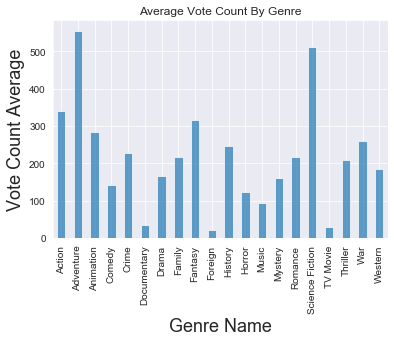

In [137]:
genre_ratings_count = df_movies.groupby('primary_genre').vote_count.mean()
genre_ratings_count.plot(kind='bar', title='Average Vote Count By Genre', alpha=.7)
sns.set_style("darkgrid")
plt.xlabel('Genre Name', fontsize=18)
plt.ylabel('Vote Count Average', fontsize=18);

The Documentary genre had third-lowest average vote count of all genres. Considering most of the genres have an average vote count over 100, the vote average should not be the only variable used for determining movie popularity.

### Research Question 2: Do movies with a longer runtime receive worse ratings than movies with shorter runtime?

### 15. Query movie runtime data to determine short and long runtimes, and plot the results.

First we'll look at the descriptive statistics for the runtime column to see where the proportions of movie runtimes.

In [138]:
#check descriptive stats on movie runtime
df_movies.runtime.describe()

count   10842.00
mean      102.14
std        31.29
min         0.00
25%        90.00
50%        99.00
75%       111.00
max       900.00
Name: runtime, dtype: float64

While we have some movies in our dataset with zero runtime, instead of deleting that data we're going to create two subsets of data called runtime_greater and runtime_lesser, and then compare the two. For runtime_greater we'll use movie runtimes greater than the 75th percentile, or 111 minutes of runtime, and up to 210 minutes(3.5 hours). Any movies longer than that are typically docuseries or some other type of movie what wouldn't be watched in a theater, which is really the type of movie we're trying to measure. 

For runtime_lesser we're going to take a different approach to the minimum movie time. Typically movies last more than an hour, but there are movie runtimes under 90 minutes, which is the 25th percentile, so we're going to evaluate shorter movies starting with a runtime of 75 minutes and up to 110 minues, just below the 75th percentile. 

In [139]:
#save movies with longer runtimes
runtime_greater = df_movies.query('runtime >= 111 & runtime <= 210')

In [140]:
#save movies with shorter runtimes
runtime_lesser = df_movies.query('runtime < 111 & runtime > 75')

In [141]:
#vote_average for longer running movies
longer_runtime_vote = runtime_greater.vote_average.mean()

In [142]:
#vote_average for shorter running movies
shorter_runtime_vote = runtime_lesser.vote_average.mean()

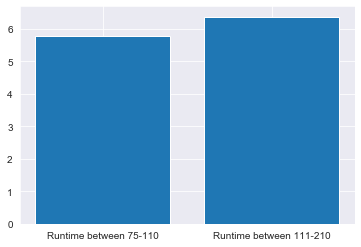

In [143]:
#plot bar chart for average votes for shorter and longer movie runtimes
plt.bar(["Runtime between 75-110", "Runtime between 111-210"], [shorter_runtime_vote, longer_runtime_vote]);

Above we can see that longer movies, on average, get better ratings than shorter movies. Another analyzation we can do is to check the correlation between these two variables. Below is a scatterplot of movies that fall between the short and long runtime values and the relationship to voting average.

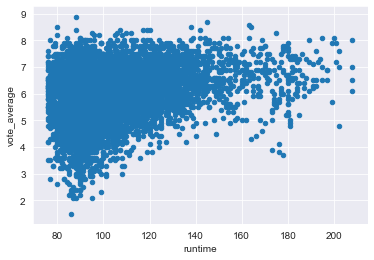

In [154]:
movies_to_plot = df_movies.query('runtime < 210 & runtime > 75')
movies_to_plot.plot(x='runtime', y='vote_average', kind='scatter');

From these results we can see that most movie runtimes fall between 75 and 140 minutes, and that there is a positive correlation between these two variables, as movies with shorter runtimes receive lower vote averages. 

These results prompt additional questions about why this the results turned out this way: 

- Are longer movies more popular because they go deeper into the movie characters or plotlines?
- Are shorter movies lacking substance and feel rushed?
- Do shorter movies lack the budget to create a higher-quality movie?

### Research Question 3: Do movies with higher budgets generally get better ratings than those with lower budgets?

### 16. Put movies into different budget levels, determine the vote average, and plot the results. 

To do this analysis, we're going to work the the budget_adj column, so all movies are considered equally. As mentioned in the column descriptions table, the budget_adj data consideres all movie budget data in terms of 2010 dollars, accounting for inflation over time.

We're also going to only consider movies with an adjusted budget over $1 million, to filter out the lowest budget movies that most people aren't familiar with, and also movies that don't have a budget value provided.

Below we'll start by looking at the descriptive statistics.

In [144]:
#save only movies with a budget over $1 million
with_budget = df_movies.query('budget_adj > 1000000')
with_budget.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,4841.00,4841.00,4841.00,4841.00,4841.00,4841.00,4841.00,4841.00,4841.00
mean,32799394.04,85445215.20,108.21,431.64,6.05,2001.16,39362355.84,108724529.05,6.99
std,39360374.70,163440051.70,22.24,808.96,0.86,11.63,42232861.09,200653200.36,3.39
min,175000.00,0.00,0.00,10.00,2.20,1960.00,1002810.21,0.00,1.00
25%,7920000.00,251495.00,94.00,41.00,5.50,1996.00,10164004.34,300600.43,4.00
50%,20000000.00,25739015.00,104.00,135.00,6.10,2004.00,25319665.85,34253645.34,7.00
75%,40000000.00,96889998.00,118.00,435.00,6.60,2010.00,52828236.08,123521044.00,10.00
max,425000000.00,2781505847.00,540.00,9767.00,8.40,2015.00,425000000.00,2827123750.00,12.00


Now that we can see the min, max, and percentile values, we're going to separate the adjusted budget values into four different budget levels. First, we'll save the adjusted budget values we need.

In [145]:
#budget_adj values for min, 25%, 50%, 75%, max
budget_values = [1002810.21, 10164004.34, 25319665.85, 52828236.08, 425000000.00]

Here we'll create the four budget level label names we'll use.

In [146]:
budget_levels = ['Low: Lowest 25% of budgets', 'Medium: 25%-50% of budgets', 'High: 50%-75% of budgets', 
             'Highest: above 75% of budgets']

Then we'll use the cut() function to place the movies with fall between certain budget values into one of the four labels, and add those labels to each row in a new column called budget_level. Specifically the values fall into the labels like this: 
- min-25%: Low: Lowest 25% of budgets
- 25%-50%: Medium: 25%-50% of budgets
- 50%-75%: High: 50%-75% of budgets
- 75%-max: Highest: above 75% of budgets


In [147]:
#create new column and save data
df_movies['budget_level'] = pd.cut(with_budget['budget_adj'], budget_values, labels=budget_levels);

We'll then group our data by budget level, and get the average vote rating for each level, and then plot the results to a bar chart.

In [148]:
df_movies.groupby('budget_level', as_index=False)['vote_average'].mean()

,budget_level,vote_average
0,Low: Lowest 25% of budgets,5.88
1,Medium: 25%-50% of budgets,6.06
2,High: 50%-75% of budgets,6.13
3,Highest: above 75% of budgets,6.13


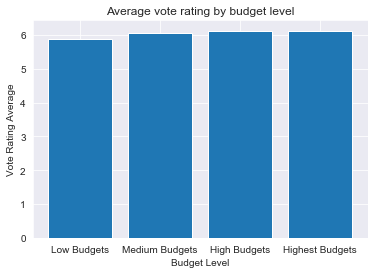

In [149]:
plt.bar([1, 2, 3, 4], [5.88, 6.06, 6.13, 6.13], tick_label=['Low Budgets', 'Medium Budgets', 'High Budgets', 'Highest Budgets'])
plt.title('Average vote rating by budget level')
plt.xlabel('Budget Level')
plt.ylabel('Vote Rating Average');

Movies with higher budgets do typically receive better ratings on average. This is not too surprising, as having more financial resources allows for more expensive actors to be hired, better equipment to be purchased, and more film to be shot to ensure the highest quality results.

### Research Question 4: What months and parts of the year do movies have the highest revenue?

### 17. Group by release month and get the average adjusted revenue for each month, and then  plot the results.

To do this analysis, we're going to work the the revenue_adj column, so all movies are considered equally. As mentioned in the column descriptions table, the revenue_adj data consideres all movie budget data in terms of 2010 dollars, accounting for inflation over time.

We'll group by the release month and get the average adjusted revenue for each month, sort the results, and then create a bar chart for the months in order.

In [150]:
revenue_monthly = with_revenue.groupby('release_month', as_index=False).revenue_adj.sum()
revenue_monthly.sort_values('revenue_adj', ascending=False)

,release_month,revenue_adj
11,12,83493057786.48
5,6,80713223165.01
4,5,61683364497.60
6,7,58560370450.21
10,11,58498077766.77
2,3,40691921843.37
9,10,38445186532.90
7,8,32559895371.69
3,4,31653858380.24
8,9,30957858018.37


Revenues for the month of december are highest on average, while for January they are the lowest. Below we'll display a bar chart with the monthly average throughout the year to see the peaks and valleys of movie attendance.

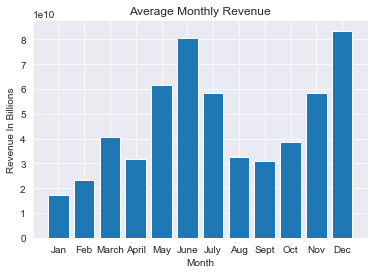

In [151]:
release_months = revenue_monthly.release_month
monthly_revenue = revenue_monthly.revenue_adj
plt.bar(release_months, monthly_revenue, tick_label=['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.title('Average Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue In Billions');

May through July and the holiday season appear to be the most popular times for moviegoers, at least in terms of revenue.

<a id='conclusions'></a>
## Conclusions

Above we analyzed whether movie genres, runtime, and budgets have an affect on ratings,  and which months movie releases bring in the most revenue. 

For movie ratings we learned several things:
-	While the Documentary genre received the highest average ratings, it also received some of the fewest votes of any genre. Perhaps movies could be weighted based on their number of votes to get a better sense of genre popularity. 
-	Longer movies had better ratings than shorter movies. We can make some assumptions that longer movies likely meant the budget was higher, which could mean that better actors and better equipment was used, but we need more information to make better conclusions. 
-	Movies with higher budgets had better ratings than movies with lower budgets. As mentioned in #2, did budget may have affected ratings because a higher budget might also influence movie length, actors hired, equipment, marketing, and other factors.

For revenue we learned that:
-	Certain months and times of year bring in the most movie revenue. What is it about these time periods that increases the revenue? In Summer months the weather is nicest outside, so why is it so popular for moviegoers? Maybe weather is a factor, because roads are safer? Movies around the holidays are heavily advertised, which may explain some of the popularity there, and it’s also a time of year when families are together, which might result in them wanting to see a movie together.

While we drew some conclusions based on our results, our analysis led to more questions that could be answered to better understand what combination of variables have the most influence on the dependent variables of ratings and revenue. 

<a id='resources'></a>
## Resources

Throughout this analysis several resources were used to help analyze data and answer quetions. Along with Udacity course material, the following links were used:

http://www.tablesgenerator.com/markdown_tables for the column description table

https://stackoverflow.com/questions/41328633/how-do-i-print-entire-number-in-python-from-describe-function for numerical data formatting

https://stackoverflow.com/questions/51102615/get-month-from-date-column to extract month from datetime

https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas for answering question 1, to add as_index=False to groupby so can sort by vote_average column

https://seaborn.pydata.org/tutorial/aesthetics.html used for changing to dark grid in question 1

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html used in multiple areas to sort data
